In [9]:
import os
import sys
import wave
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

8000
[0.00000000e+00 1.25015627e-04 2.50031254e-04 ... 9.99749969e-01
 9.99874984e-01 1.00000000e+00]


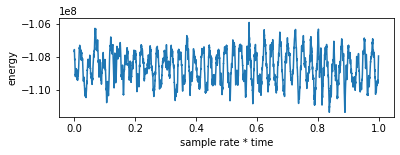

In [37]:
audio_dir_noise = '/Users/maggie/Desktop/H6-black_labeled_audio/BS3/audio_noise/*.wav'
audio_dir_quiet = '/Users/maggie/Desktop/H6-black_labeled_audio/BS3/audio_quiet/*.wav'


noise_files = glob(audio_dir_noise)
quiet_files = glob(audio_dir_quiet)


n1 = noise_files[0]
q1 = quiet_files[0]
spf = wave.open(n1, 'r')

# signal = spf.readframes(-1)
# signal = np.fromstring(signal, 'Int16')

signal_wave = wave.open(n1, 'r')
sample_rate = 8000
sig = np.frombuffer(signal_wave.readframes(sample_rate), dtype='int32')
fs = spf.getframerate()
print(fs)
time_axis = np.linspace(0, len(sig) / fs, num=len(sig))
print(time_axis)

plt.figure(1)

plot_a = plt.subplot(211)
plot_a.plot(time_axis, sig)

plot_a.set_xlabel('sample rate * time')
plot_a.set_ylabel('energy')

plt.show()
# plt.figure(1)
# plt.title('signal wave')
# plt.plot(signal)
# plt.show()

noise
61.472768 -108.59697766400001
107.06944 -108.7093798912
80.36352 -108.7669848064
84.803584 -108.6857672704
72.9088 -108.7340658688
58.392576 -108.81828003839999

no noise
9.125888 -108.545036288
54.247424 -108.59716403200001
5.07904 -108.5392734208
57.42592 -108.54850621439999
20.80768 -108.5602701312
6.668288 -108.567163904


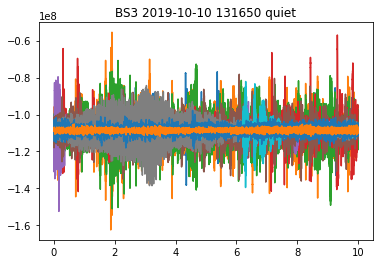

In [88]:
from scipy.io.wavfile import read


def plot_audio(audio_file):
    name = os.path.basename(audio_file).strip('_audio.wav')
    hub = audio_file.split('/')[-3]
    occ = audio_file.split('/')[-2].strip('audio_')
    
    input_data = read(audio_file)
    sig = input_data[1]
    
    M = max(sig)
    m = min(sig)
    a = np.mean(sig)
    

    time_axis = np.linspace(0, len(sig) / fs, num=len(sig))

    plt.figure(1)
#     plt.ticklabel_format(style='plain')
    plt.plot(time_axis, sig)
    title = f'{hub} {name} {occ}'
    plt.title(title)
    plt.savefig(f'/Users/maggie/Desktop/plot_audio_H6/{hub}_{name}_{occ}')
    
    return M, m, a, title
#     plot_a.set_xlabel('time')
#     plot_a.set_ylabel('energy')
#     plot_a = plt.subplot(211)
# #     plot_a.ticklabel_format(style='plain')
#     plot_a.plot(time_axis, sig)
#     plot_a.set_xlabel('time')
#     plot_a.set_ylabel('energy')

#     plot_b = plt.subplot(212)
#     plot_b.specgram(sig, NFFT=1024, Fs=sample_rate, noverlap=900)
#     plot_b.set_xlabel('Time')
#     plot_b.set_ylabel('Frequency')



# plt.specgram(audio, NFFT=1024, Fs=sample_rate, noverlap=900)
# # plt.set_xlabel('Time')
# # plt.set_ylabel('Frequency')
# plt.show()

max_noise = np.nan
min_noise = np.nan
print('noise')
for f in noise_files:
    M, m, a, title = plot_audio(f)
    print((M-m)/1000000, a/1000000)#, title)
print('\nno noise')
for f in quiet_files:
    M, m, a, title = plot_audio(f)
    print((M-m)/1000000, a/1000000)#, title)

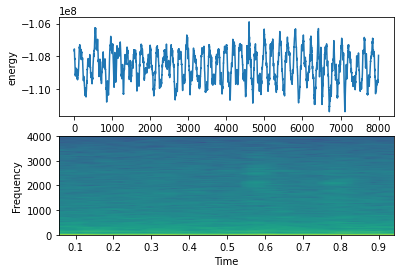

In [49]:
import wave
import numpy as np
import matplotlib.pyplot as plt

signal_wave = wave.open(n1, 'r')
sample_rate = 8000
sig = np.frombuffer(signal_wave.readframes(sample_rate), dtype=np.int32)


# left, right = sig[0::2], sig[1::2]


plt.figure(1)

plot_a = plt.subplot(211)
plot_a.plot(sig)
plot_a.set_xlabel('sample rate * time')
plot_a.set_ylabel('energy')

plot_b = plt.subplot(212)
plot_b.specgram(sig, NFFT=1024, Fs=sample_rate, noverlap=900)
plot_b.set_xlabel('Time')
plot_b.set_ylabel('Frequency')

plt.show()